# Gradient Boosting and AdaBoost
Gradient Boosting and AdaBoost are both boosting techniques used in ensemble learning. Boosting involves combining weak learners (typically decision trees) into a strong model by sequentially training models where each new model focuses on correcting the errors of its predecessor.

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoost Classifier:
Accuracy: 0.8
Confusion Matrix:
 [[7 0]
 [4 9]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      1.00      0.78         7
           1       1.00      0.69      0.82        13

    accuracy                           0.80        20
   macro avg       0.82      0.85      0.80        20
weighted avg       0.87      0.80      0.80        20


Gradient Boosting Classifier:
Accuracy: 0.8
Confusion Matrix:
 [[7 0]
 [4 9]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      1.00      0.78         7
           1       1.00      0.69      0.82        13

    accuracy                           0.80        20
   macro avg       0.82      0.85      0.80        20
weighted avg       0.87      0.80      0.80        20



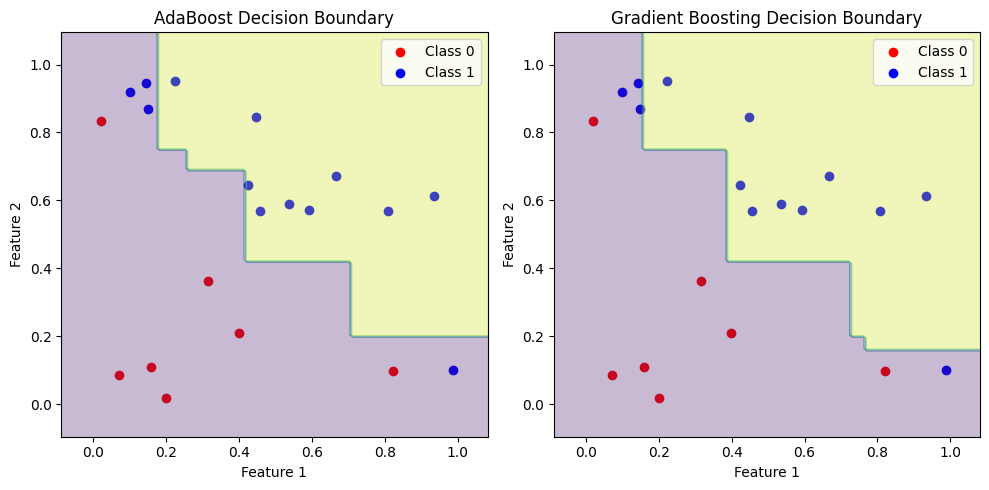

In [1]:
# Gradient Boosting and AdaBoost Classification Notebook

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Generate synthetic binary classification data
np.random.seed(0)
X = np.random.rand(100, 2)  # 100 samples with 2 features
y = (X[:, 0] + X[:, 1] > 1).astype(int)  # Class 1 if the sum of the features is greater than 1

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# AdaBoost Classifier (Using DecisionTree as the weak learner)
ada_model = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=1),  # Weak learner: decision stump
    n_estimators=100,  # Number of boosting rounds
    random_state=0
)

# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(
    n_estimators=100,  # Number of boosting rounds
    learning_rate=0.1,  # Shrinkage rate for contribution of each tree
    max_depth=3,  # Maximum depth of individual trees
    random_state=0
)

# Train both models
ada_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# Predict using AdaBoost
y_pred_ada = ada_model.predict(X_test)

# Predict using Gradient Boosting
y_pred_gb = gb_model.predict(X_test)

# Evaluate AdaBoost model performance
print("AdaBoost Classifier:")
accuracy_ada = accuracy_score(y_test, y_pred_ada)
conf_matrix_ada = confusion_matrix(y_test, y_pred_ada)
class_report_ada = classification_report(y_test, y_pred_ada)
print("Accuracy:", accuracy_ada)
print("Confusion Matrix:\n", conf_matrix_ada)
print("Classification Report:\n", class_report_ada)

# Evaluate Gradient Boosting model performance
print("\nGradient Boosting Classifier:")
accuracy_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
class_report_gb = classification_report(y_test, y_pred_gb)
print("Accuracy:", accuracy_gb)
print("Confusion Matrix:\n", conf_matrix_gb)
print("Classification Report:\n", class_report_gb)

# Visualize the decision boundary for both models
plt.figure(figsize=(10, 5))

# AdaBoost decision boundary
plt.subplot(1, 2, 1)
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], color='red', label='Class 0')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], color='blue', label='Class 1')
plt.title('AdaBoost Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Create a mesh grid for decision boundary visualization (AdaBoost)
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = ada_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.legend()

# Gradient Boosting decision boundary
plt.subplot(1, 2, 2)
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], color='red', label='Class 0')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], color='blue', label='Class 1')
plt.title('Gradient Boosting Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Create a mesh grid for decision boundary visualization (Gradient Boosting)
Z = gb_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

### Explanation of Code Components

1. **Data Generation**: Synthetic binary classification data is generated where points are classified based on the sum of two features.

2. **AdaBoost Classifier**:
   - **Base Estimator**: Uses a decision tree classifier with a maximum depth of 1 (also known as a decision stump) as the weak learner.
   - **n_estimators**: Specifies the number of boosting rounds (weak learners).
   - The model is trained and used for prediction.

3. **Gradient Boosting Classifier**:
   - **n_estimators**: Specifies the number of boosting rounds.
   - **learning_rate**: Controls the contribution of each tree to the final model. Lower values generally lead to better generalization but require more trees.
   - **max_depth**: Controls the depth of the individual trees (weak learners).
   - The model is trained and used for prediction.

4. **Model Evaluation**: Both models are evaluated using accuracy, confusion matrix, and classification report to show metrics like precision, recall, and F1-score.

5. **Visualization**: The decision boundaries for both models are plotted using a contour plot to visualize the predictions and how the models separate the classes.

### Key Points of AdaBoost and Gradient Boosting

#### **AdaBoost**:
- **Boosting Focus**: In AdaBoost, each subsequent model is trained on the errors of the previous one. Misclassified points get higher weights in the next round.
- **Weak Learners**: AdaBoost often uses simple decision stumps (depth-1 decision trees) as weak learners.
- **Sequential Training**: AdaBoost emphasizes correcting mistakes from previous learners.

#### **Gradient Boosting**:
- **Gradient Descent**: Gradient Boosting builds trees sequentially, with each tree trying to reduce the residual error of the previous trees by optimizing through gradient descent.
- **Learning Rate**: Gradient Boosting has a learning rate parameter to control how much each tree contributes to the final model.
- **Flexible Weak Learners**: Unlike AdaBoost, Gradient Boosting can use deeper trees, but typically, the trees are shallow (e.g., depth-3).

### Differences Between AdaBoost and Gradient Boosting
- **Error Adjustment**: AdaBoost adjusts the weight of the incorrectly classified points at each iteration. Gradient Boosting adjusts the residual errors directly.
- **Learning Rate**: Gradient Boosting has a built-in learning rate that scales the contribution of each learner.
- **Use Case**: AdaBoost is effective for improving weak learners (such as decision stumps), while Gradient Boosting is generally more powerful for building strong learners through gradient optimization.